In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/result/출력/최종학습데이터_대구.csv")
data.index = data.날짜
data.index = pd.to_datetime(data.index)
data.drop(['Unnamed: 0','날짜','도매가격품명', '지명', '시도명', '관측지점명', '도매가격날짜','SPI3'], axis=1, inplace=True)

In [3]:
data

,면적,생산량,SPI1,EDI,일반유가,면세유가,수입중량(30일전),도매가격
날짜,,,,,,,,
2013-01-01,2842,348375,1.96,2.11,1742.89,1131.756969,278460.0,12000.0
2013-01-02,2842,348375,1.97,2.02,1742.85,1131.720605,278460.0,12000.0
2013-01-03,2842,348375,1.85,1.93,1741.97,1130.920605,278460.0,12000.0
2013-01-04,2842,348375,1.83,1.90,1741.97,1130.920605,278460.0,12000.0
2013-01-05,2842,348375,1.73,1.85,1741.93,1130.884242,278460.0,12000.0
...,...,...,...,...,...,...,...,...
2020-12-27,2400,323100,-3.81,-0.01,1196.84,615.350000,0.0,9000.0
2020-12-28,2400,323100,-1.46,0.14,1201.25,615.730000,0.0,10000.0
2020-12-29,2400,323100,-1.39,0.11,1206.17,618.840000,0.0,10000.0


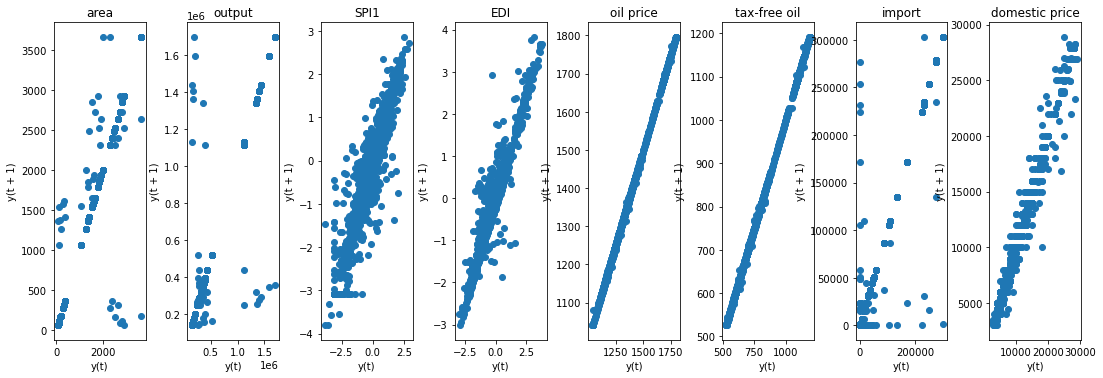

In [4]:
# 정상성 검증 - 연속적인 관찰값들에 대한 상관관계 분석 그래프. 즉 정상성 알아보기 위한 용도임 !!
from pandas.plotting import lag_plot
   
f2, (ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(1, 8, figsize=(15, 5))
f2.tight_layout()


lag_plot(data['면적'], ax=ax4)
ax4.set_title('area')

lag_plot(data['생산량'], ax=ax5)
ax5.set_title('output')

lag_plot(data['SPI1'], ax=ax6)
ax6.set_title('SPI1')

lag_plot(data['EDI'], ax=ax7)
ax7.set_title('EDI')

lag_plot(data['일반유가'], ax=ax8)
ax8.set_title('oil price')

lag_plot(data['면세유가'], ax=ax9)
ax9.set_title('tax-free oil')

lag_plot(data['수입중량(30일전)'], ax=ax10)
ax10.set_title('import')

lag_plot(data['도매가격'], ax=ax11)
ax11.set_title('domestic price')

plt.show()

In [5]:
rawData = data.copy(deep=True)

In [6]:
for i in data.columns :
    data[i] = data[i] - data[i].shift(1)
data = data.dropna()

In [7]:
# adf 검정 (시계열의 정상성 검증)
from statsmodels.tsa.stattools import adfuller

for i in data.columns :
    X1 = np.array(data[i])
    X1 = X1[~np.isnan(X1)]

    result = adfuller(X1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -53.944461
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -53.944416
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -51.170826
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -12.650164
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -6.031508
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -7.332654
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -53.936032
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -8.574675
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [8]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

for i in data.columns :
    X1 = np.array(data[i])
    X1 = X1[~np.isnan(X1)]
    
    kpss_test(X1)

KPSS Statistic: 0.02427070381071382
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.010600996019439693
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.007596960593245515
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.05109614238383293
p-value: 0.1
num lags: 24
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.18118323278003054
p-value: 0.1
num lags: 29
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.26583444945944557
p-value: 0.1
num lags: 26
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The se

C:\Users\ztophoon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ztophoon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ztophoon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ztophoon\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-va

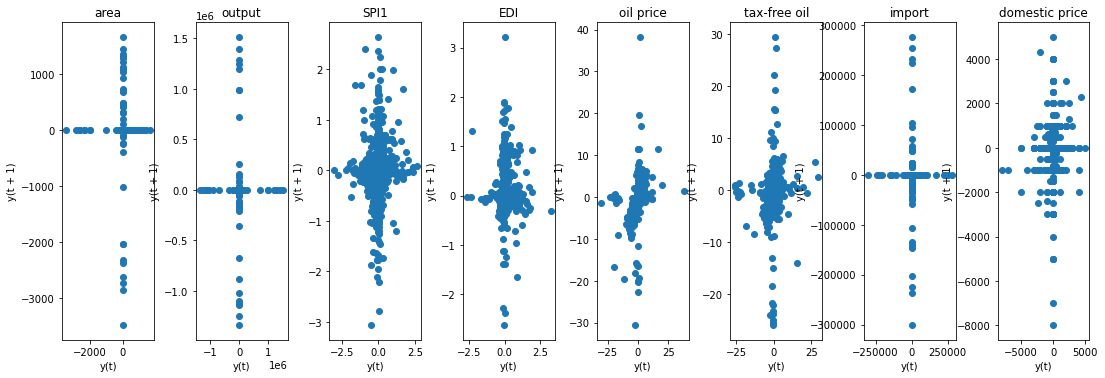

In [9]:
from pandas.plotting import lag_plot
   
f2, (ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(1, 8, figsize=(15, 5))
f2.tight_layout()


lag_plot(data['면적'], ax=ax4)
ax4.set_title('area')

lag_plot(data['생산량'], ax=ax5)
ax5.set_title('output')

lag_plot(data['SPI1'], ax=ax6)
ax6.set_title('SPI1')

lag_plot(data['EDI'], ax=ax7)
ax7.set_title('EDI')

lag_plot(data['일반유가'], ax=ax8)
ax8.set_title('oil price')

lag_plot(data['면세유가'], ax=ax9)
ax9.set_title('tax-free oil')

lag_plot(data['수입중량(30일전)'], ax=ax10)
ax10.set_title('import')

lag_plot(data['도매가격'], ax=ax11)
ax11.set_title('domestic price')

plt.show()